# Fashion Recognition NN

In [1]:
# Imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import halper

import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import optim
from torchvision import datasets, transforms

## Get the data

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', 
                                 download=True, train=True,
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                download=True, train=False,
                                transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

## View random image from the dataset

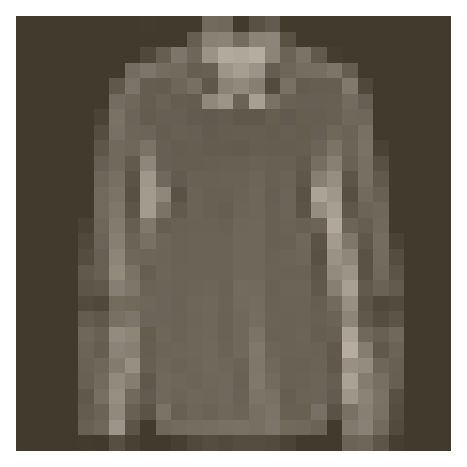

In [3]:
image, label = next(iter(trainloader))
halper.imshow(image[0,:]);

## Define network architecture

In [4]:
#   Each image is 28x28 pixels, 784 in total
#   There are 10 clasees

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

## Create the network

In [5]:
# Define criterion - NLLLoss or CrossEntropyLoss
criterion = nn.NLLLoss()

# Define optimizer - optim.SGD or optim.Adam
# and Learning Rate
optimizer = optim.SGD(model.parameters(), lr=0.005)

## Train the network

In [7]:
# Adjust hyperparameters (hidden layers, learning rate, etc)
# to get training loss below 0.4

epochs = 20
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()

        output = model(images)
        
        loss = criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Training loss: {:.3f}..".format(running_loss/len(trainloader)))

Training loss: 0.865..
Training loss: 0.656..
Training loss: 0.579..
Training loss: 0.530..
Training loss: 0.497..
Training loss: 0.473..
Training loss: 0.455..
Training loss: 0.441..
Training loss: 0.428..
Training loss: 0.419..
Training loss: 0.409..
Training loss: 0.400..
Training loss: 0.391..
Training loss: 0.384..
Training loss: 0.376..
Training loss: 0.370..
Training loss: 0.363..
Training loss: 0.357..
Training loss: 0.351..
Training loss: 0.345..


## Test the network

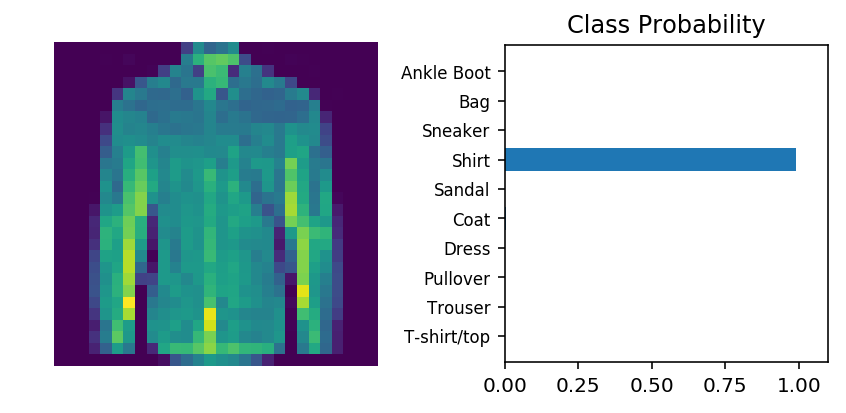

In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate class probabilities
ps = torch.exp(model(img))

# Plot the image and probabilities
halper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

## Measuring accuracy

In [ ]:
# TODO: add code to measure model accuracy